# Tugas 01 : **Crawling Berita**

NAMA : Mohammad Iqbal Surya Ramadhan

NIM  : 210411100002

MATA KULIAH : Pencarian dan Penambangan Web - A

# Tugas Crawling Berita Online Untuk Mendapatkan **Judul**, **Tanggal** dan **Isi** dari sebuah halaman website berita online

**Pengertian Crawling**


Crawling adalah proses otomatisasi yang dilakukan oleh program komputer untuk menjelajahi dan mengumpulkan data dari halaman-halaman web di internet. Proses ini sering kali dilakukan oleh bot yang dikenal sebagai web crawlers atau spiders. Web crawlers ini akan menelusuri (crawl) berbagai situs web, mengakses halaman-halaman yang ada, dan mengunduh atau mengekstraksi informasi yang dibutuhkan untuk kemudian disimpan atau diindeks dalam database.

**Crawling website berita adalah** *proses otomatis mengumpulkan data dari berbagai situs berita di internet. Proses ini dilakukan oleh program khusus yang disebut crawler atau spider. Crawler ini akan menjelajahi internet, mengunjungi berbagai situs berita, dan mengambil data seperti judul berita, isi berita, tanggal publikasi, dan tautan terkait.*

**Beautiful Soup (Python)**

**Kelebihan:**

*Mudah digunakan dan memiliki API yang intuitif.*

*Cocok untuk proyek-proyek kecil hingga menengah.*

*Fleksibel dalam parsing HTML dan XML.*

**Kekurangan:**

*Tidak sekuat Scrapy untuk proyek yang kompleks.*

*Tidak memiliki fitur built-in untuk manajemen permintaan seperti Scrapy.*


**Fungsi Crawling**



1.   Mengindeks Halaman Web:


*   Crawling adalah langkah pertama dalam proses pengindeksan halaman web oleh mesin pencari. Web crawler akan mengunjungi halaman-halaman web, membaca kontennya, dan menyimpannya ke dalam indeks mesin pencari. Ini memungkinkan mesin pencari untuk menemukan dan menampilkan halaman-halaman tersebut dalam hasil pencarian.



2.   Pengumpulan Data:

*   Crawling memungkinkan pengumpulan data dari berbagai situs web untuk keperluan tertentu, seperti analisis bisnis, riset pasar, atau pengembangan model kecerdasan buatan. Dengan crawling, data dari berbagai sumber bisa dikumpulkan secara otomatis tanpa harus melakukannya secara manual.



3. Pemantauan Perubahan Konten:

*   Dengan crawling, perubahan atau pembaruan pada suatu situs web dapat dipantau secara berkala. Ini berguna untuk aplikasi yang memerlukan informasi terbaru, seperti agregator berita, alat pemantau harga, atau layanan notifikasi.



4. SEO (Search Engine Optimization):

*   Bagi pengelola situs web, memahami bagaimana proses crawling bekerja dapat membantu dalam optimasi mesin pencari (SEO). Dengan memastikan bahwa halaman-halaman web mereka mudah di-crawl dan diindeks, mereka bisa meningkatkan kemungkinan situs web mereka muncul di hasil pencarian mesin pencari.


**Teknologi yang Digunakan :**

*   Library Pemrograman: Python dengan library seperti BeautifulSoup4, Scrapy, dan Requests adalah pilihan populer karena fleksibel dan memiliki banyak fitur.

*   Python dan Scrapy : Scrapy adalah framework open-source di Python yang banyak digunakan untuk crawling data, termasuk berita online. Scrapy memudahkan proses fetching, parsing, dan menyimpan data.

*   BeautifulSoup: Library Python ini digunakan untuk mengurai dokumen HTML dan XML, membantu mengekstrak data yang diinginkan dari halaman web.

*   Selenium: Selenium digunakan untuk melakukan crawling pada halaman web yang memerlukan interaksi dinamis, seperti login atau scroll.

*   API Berita: Beberapa situs berita menyediakan API yang memudahkan akses data mereka tanpa perlu crawling. Ini adalah cara yang lebih legal dan stabil untuk mendapatkan data.

*   Perangkat Lunak Khusus: Ada juga perangkat lunak khusus yang dirancang untuk crawling data, seperti Octoparse dan ParseHub.

**Beautiful Soup: Perpustakaan Python untuk Parsing HTML dan XML**

**Beautiful Soup** *adalah sebuah perpustakaan Python yang sangat populer dan mudah digunakan untuk parsing dokumen HTML dan XML. Dengan menggunakan Beautiful Soup, kita dapat mengekstrak data dari halaman web dengan cara yang efisien dan elegan. Bayangkan BeautifulSoup sebagai sebuah parser yang dapat mengubah dokumen HTML atau XML yang berantakan menjadi struktur data yang mudah dipahami oleh Python.*

**Mengapa Menggunakan BeautifulSoup?**

*   Sederhana: BeautifulSoup memiliki API yang sangat intuitif dan mudah dipelajari, bahkan bagi pemula.

*   Fleksibel: BeautifulSoup dapat digunakan untuk berbagai jenis parsing, mulai dari tugas sederhana hingga yang kompleks.

*   Pythonic: BeautifulSoup terintegrasi dengan baik dengan ekosistem Python, sehingga Anda dapat dengan mudah menggabungkan BeautifulSoup dengan perpustakaan Python lainnya.

*   Komunitas yang Besar: BeautifulSoup memiliki komunitas yang sangat aktif, sehingga Anda dapat dengan mudah menemukan dokumentasi, tutorial, dan bantuan jika Anda mengalami kesulitan.



**Kegunaan BeautifulSoup**

**Web Scraping:** *Mengambil data dari halaman web untuk berbagai tujuan, seperti analisis sentimen, riset pasar, dan pengembangan aplikasi.*

**Parsing Data:** *Mengubah data yang tidak terstruktur menjadi format yang terstruktur.*

**Automasi:** *Mengotomatiskan tugas-tugas yang berulang, seperti mengunduh data dari banyak halaman web.*

**Contoh Penggunaan Crawling Data :**

**E-commerce:** *Untuk membandingkan harga produk dari berbagai toko online.*

**Riset Pasar:** *Untuk mengumpulkan data tentang tren pasar, opini konsumen, atau perilaku kompetitor.*

**Jurnalisme :** *Untuk mengumpulkan data dari berbagai sumber berita untuk membuat laporan yang komprehensif.*

**Pengembangan Produk:** *Untuk mengumpulkan data yang dapat digunakan untuk melatih model machine learning dan mengembangkan produk baru.*

**Akademik:** *Untuk mengumpulkan data untuk penelitian ilmiah.*

**Tujuan Crawling Berita Online :**

**Mengumpulkan Informasi :** *Tujuan utama crawling berita adalah untuk mengumpulkan informasi terbaru dari berbagai sumber berita. Informasi ini bisa digunakan untuk membuat agregasi berita, analisis sentimen, atau membangun basis data untuk penelitian.*

**Pemantauan Berita:** *Crawling dapat digunakan untuk memantau berita secara real-time, membantu perusahaan atau individu untuk tetap up-to-date dengan perkembangan terbaru.*

**Pengindeksan untuk Mesin Pencari:** *Beberapa perusahaan melakukan crawling untuk mengindeks konten berita sehingga dapat ditampilkan dalam hasil pencarian.*

**Membangun Agregator Berita:** *Data yang dikumpulkan oleh crawler dapat digunakan untuk membuat agregator berita, yaitu platform yang mengumpulkan berita dari berbagai sumber dan menyajikannya dalam satu tempat. Contohnya adalah Google News.*

**Analisis Sentimen:** *Dengan mengumpulkan berita dalam jumlah besar, kita dapat menganalisis sentimen publik terhadap suatu topik tertentu. Misalnya, kita dapat mengetahui apakah opini publik terhadap suatu produk baru cenderung positif atau negatif.*

**Riset Jurnalistik:** *Wartawan dapat menggunakan data yang dikumpulkan oleh crawler untuk melakukan investigasi atau membuat laporan yang lebih mendalam.*

**Pengembangan AI:** *Data berita dapat digunakan untuk melatih model machine learning, misalnya untuk membuat sistem rekomendasi berita atau untuk menghasilkan berita secara otomatis.*


**Manfaat dan Penggunaan Data Hasil Crawling :**

**Agregasi Berita :** *Data yang dikumpulkan dapat digunakan untuk membuat platform agregasi berita yang menyajikan berita dari berbagai sumber.*

**Analisis Sentimen :** *Data berita dapat digunakan untuk analisis sentimen, membantu perusahaan memahami opini publik terhadap topik tertentu.*

**Pemantauan Media :** Data dapat dimanfaatkan oleh agensi untuk memantau media dan menyusun laporan tentang tren berita.

**Penelitian :** *Peneliti dapat menggunakan data hasil crawling untuk studi terkait jurnalisme, media, atau fenomena sosial lainnya.*


# Code Program **Crawling Berita Online :**

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Fungsi untuk mengambil data dari halaman web Detik.com
def get_data(url, kategori):
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return

    soup = BeautifulSoup(response.content, "html.parser")
    articles = soup.find_all("article", class_="list-content__item")

    for article in articles:
        if len(judul) >= 10:  # Hentikan jika sudah 10 berita
            return

        try:
            link = article.find("a")["href"]
            article_response = requests.get(link)
            article_response.raise_for_status()
        except (requests.exceptions.RequestException, TypeError) as e:
            print(f"Request for article failed: {e}")
            continue

        article_soup = BeautifulSoup(article_response.content, "html.parser")
        title_element = article_soup.find("h1", class_="detail__title")
        title = title_element.text.strip() if title_element else "Title Not Found"
        date_element = article_soup.find("div", class_="detail__date")
        date = date_element.text.strip() if date_element else "Date Not Found"
        content_element = article_soup.find("div", class_="detail__body-text")
        content = content_element.text.strip() if content_element else "Content Not Found"

        judul.append(title)
        tanggal.append(date)
        isi.append(content)

        print(title)
        time.sleep(1)  # Menambahkan jeda waktu 1 detik antara permintaan artikel

# Membuat list url dan kategori yang akan di-crawl
base_urls = ["https://oto.detik.com/indeks"]
categories = ["Otomotif"]

# Inisialisasi list untuk menyimpan data
judul = []
tanggal = []
isi = []

# Melakukan iterasi untuk setiap url dan kategori
for base_url, category in zip(base_urls, categories):
    for page in range(1, 4):  # Looping untuk beralih halaman
        if len(judul) >= 10:  # Hentikan jika sudah 10 berita
            break

        url = f"{base_url}/{page}"
        get_data(url, category)
        time.sleep(2)  # Menambahkan jeda waktu 2 detik antara permintaan halaman

# Membuat dataframe dari list data
df = pd.DataFrame({
    "judul": judul,
    "tanggal": tanggal,
    "isi": isi
})

# Menyimpan dataframe ke file CSV
df.to_csv("Crawl-berita-Otomotif.csv", index=False)


Komunitas Moge HOG Indo Jakarta Chapter Tuntaskan Touring ke Bali
Hyundai Venue Siap Tantang Rocky-Raize, Segini Nilai Jualnya
Ini Cara Komunitas Toyota Yaris Rayakan Ulang Tahun Ke-18
Perusahaan Induk KTM PHK Ratusan Karyawan Gara-gara Penjualan Anjlok
Aktivitas Produksi Mobil di Pabrik GM Ekuador yang Bakal Tutup Selamanya
Penjualan Sepeda Motor Tetap 'Aman' Berkat Hal Ini
Potret Mobil Baru Fajar Alfian, Hadiah untuk Orang Tua
Pemerintah Diminta Tutup Gojek-Grab, Nasib Ojol Bagaimana?
Sialnya Nasib Luca Marini: Balapan Sendirian di Belakang, Nyaris Di-overlap Marquez
Kesederhanaan Paus Fransiskus: Dulu Tolak Lamborghini, Kini Naik Innova Zenix


In [7]:
df=pd.read_csv("Crawl-berita-Otomotif.csv")
df

,judul,tanggal,isi
0,Komunitas Moge HOG Indo Jakarta Chapter Tuntas...,"Selasa, 03 Sep 2024 20:38 WIB",Jakarta - Komunitas motor gede (moge) Harley-D...
1,"Hyundai Venue Siap Tantang Rocky-Raize, Segini...","Selasa, 03 Sep 2024 20:01 WIB",Jakarta - Hyundai telah mendaftarkan SUV compa...
2,Ini Cara Komunitas Toyota Yaris Rayakan Ulang ...,"Selasa, 03 Sep 2024 19:43 WIB",Jakarta - Toyota Yaris Club Indonesia (TYCI) m...
3,Perusahaan Induk KTM PHK Ratusan Karyawan Gara...,"Selasa, 03 Sep 2024 19:07 WIB","Jakarta - Perusahaan induk KTM, Pierer Mobilit..."
4,Aktivitas Produksi Mobil di Pabrik GM Ekuador ...,"Selasa, 03 Sep 2024 18:30 WIB",Ekuador - Pabrik General Motors GM.N di Ekuado...
5,Penjualan Sepeda Motor Tetap 'Aman' Berkat Hal...,"Selasa, 03 Sep 2024 18:04 WIB",Jakarta - Angka penjualan motor bisa dikatakan...
6,"Potret Mobil Baru Fajar Alfian, Hadiah untuk O...","Selasa, 03 Sep 2024 17:43 WIB","Jakarta - Fajar Alfian, pebulu tangkis nasiona..."
7,"Pemerintah Diminta Tutup Gojek-Grab, Nasib Ojo...","Selasa, 03 Sep 2024 17:13 WIB",Jakarta - Garda Indonesia tak setuju dengan de...
8,Sialnya Nasib Luca Marini: Balapan Sendirian d...,"Selasa, 03 Sep 2024 16:45 WIB",Jakarta - Nasib sial menimpa Luca Marini pada ...
9,Kesederhanaan Paus Fransiskus: Dulu Tolak Lamb...,"Selasa, 03 Sep 2024 16:13 WIB","Jakarta - Paus Fransiskus, pemimpin negara Vat..."


# PENJELASAN CODE PROGRAM **CRAWLING DATA BERITA ONLINE :**

**Import Libraries**

```
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

```
**requests :** *Library ini digunakan untuk mengirimkan HTTP request ke situs web dan mendapatkan respons dalam bentuk HTML.*

**BeautifulSoup :** *Merupakan bagian dari library bs4 yang digunakan untuk mengurai dan mengekstrak data dari dokumen HTML atau XML dengan cara yang mudah dibaca.*

**pandas :** *Library ini digunakan untuk manipulasi dan analisis data. Di sini, kita menggunakannya untuk membuat DataFrame dan menyimpan data dalam format CSV.*

**time :** *Library standar Python yang digunakan untuk mengatur jeda waktu (delay) antara operasi tertentu.*


**Fungsi get_data**

```
def get_data(url, kategori):
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return

    soup = BeautifulSoup(response.content, "html.parser")
    articles = soup.find_all("article", class_="list-content__item")

```

**def get_data(url, kategori):** *Mendefinisikan sebuah fungsi bernama get_data yang menerima dua parameter : url (alamat halaman web yang akan di-crawl) dan kategori (kategori berita, misalnya 'Otomotif').*

**try: response = requests.get(url):** *Mengirimkan request HTTP GET ke url yang diberikan untuk mendapatkan halaman web.*

**response.raise_for_status():** *Memeriksa apakah permintaan HTTP berhasil (status kode 200). Jika gagal, exception akan di-raise.*

**except requests.exceptions.RequestException as e:** *Menangkap semua jenis error yang terkait dengan HTTP request, dan menampilkan pesan error jika ada.*

**soup = BeautifulSoup(response.content, "html.parser"):** *Mengurai konten HTML dari respons web menggunakan BeautifulSoup untuk mempermudah ekstraksi data.*

**articles = soup.find_all("article", class_="list-content__item"):** *Mencari semua elemen article dengan class list-content__item, yang kemungkinan besar merupakan elemen HTML yang berisi berita.*




**Ekstraksi Data dari Setiap Artikel**

```
    for article in articles:
        if len(judul) >= 10:  # Hentikan jika sudah 10 berita
            return

        try:
            link = article.find("a")["href"]
            article_response = requests.get(link)
            article_response.raise_for_status()
        except (requests.exceptions.RequestException, TypeError) as e:
            print(f"Request for article failed: {e}")
            continue

        article_soup = BeautifulSoup(article_response.content, "html.parser")
        title_element = article_soup.find("h1", class_="detail__title")
        title = title_element.text.strip() if title_element else "Title Not Found"
        date_element = article_soup.find("div", class_="detail__date")
        date = date_element.text.strip() if date_element else "Date Not Found"
        content_element = article_soup.find("div", class_="detail__body-text")
        content = content_element.text.strip() if content_element else "Content Not Found"

        judul.append(title)
        tanggal.append(date)
        isi.append(content)

        print(title)
        time.sleep(1)  # Menambahkan jeda waktu 1 detik antara permintaan artikel

```

**for article in articles :** *Iterasi melalui setiap elemen article yang ditemukan di halaman.*

**if len(judul) >= 10 :** *Mengecek apakah jumlah berita yang di-crawl sudah mencapai 10. Jika ya, fungsi akan berhenti (return).*

**link = article.find("a")["href"] :** *Menemukan elemen a (link) di dalam artikel dan mengambil atribut href yang merupakan URL dari artikel tersebut.*

**article_response = requests.get(link) :** *Mengirimkan request HTTP GET ke URL artikel untuk mendapatkan konten halaman berita.*

**article_soup = BeautifulSoup(article_response.content, "html.parser")** *Mengurai konten HTML dari halaman artikel.*

**title_element = article_soup.find("h1", class_="detail__title") :** *Mencari elemen h1 yang memiliki class detail__title untuk mendapatkan judul berita.*

**title = title_element.text.strip() if title_element else "Title Not Found" :** *Jika elemen judul ditemukan, teksnya diekstrak dan dihapus spasi berlebih; jika tidak, akan menggunakan nilai default "Title Not Found".*

**date_element = article_soup.find("div", class_="detail__date") :** *Mencari elemen div yang memiliki class detail__date untuk mendapatkan tanggal publikasi berita.*

**content_element = article_soup.find("div", class_="detail__body-text") :** *Mencari elemen div yang memiliki class detail__body-text untuk mendapatkan isi berita.*

**judul.append(title), tanggal.append(date), isi.append(content) :** *Menambahkan judul, tanggal, dan isi berita ke dalam list yang sesuai.*

**time.sleep(1) :** *Menambahkan jeda waktu 1 detik antara permintaan untuk menghindari terlalu banyak permintaan dalam waktu singkat (rate-limiting).*



**Inisialisasi URL dan Kategori**

```
base_urls = ["https://oto.detik.com/indeks"]
categories = ["Otomotif"]

```
**base_urls :** *List yang berisi URL dasar dari halaman indeks berita untuk kategori tertentu (dalam hal ini, Otomotif).*

**categories :** *List yang berisi kategori berita yang akan di-crawl.*


**Inisialisasi List untuk Menyimpan Data**

```
judul = []
tanggal = []
isi = []

```
**judul, tanggal, isi:** *List kosong yang akan digunakan untuk menyimpan data berita yang di-crawl, seperti judul, tanggal, dan isi berita.*

**Iterasi Melalui Halaman dan Kategori**

```
for base_url, category in zip(base_urls, categories):
    for page in range(1, 4):  # Looping untuk beralih halaman
        if len(judul) >= 10:  # Hentikan jika sudah 10 berita
            break

        url = f"{base_url}/{page}"
        get_data(url, category)
        time.sleep(2)  # Menambahkan jeda waktu 2 detik antara permintaan halaman

```
**for base_url, category in zip(base_urls, categories) :** *Iterasi melalui setiap pasangan base_url dan category (meskipun dalam contoh ini hanya ada satu kategori dan URL).*

**for page in range(1, 4) :** *Looping untuk halaman 1 hingga 3, untuk meng-crawl beberapa halaman indeks berita.*

**if len(judul) >= 10 :** *Mengecek apakah sudah ada 10 berita yang di-crawl. Jika ya, iterasi dihentikan (break).*

**url = f"{base_url}/{page}" :** *Menggabungkan base_url dengan nomor halaman untuk membuat URL yang lengkap.*

**get_data(url, category) :** *Memanggil fungsi get_data untuk meng-crawl data dari halaman tersebut.*

**time.sleep(2) :** *Menambahkan jeda waktu 2 detik antara permintaan halaman untuk mencegah rate-limiting.*


**Membuat DataFrame dan Menyimpan ke CSV**

```
df = pd.DataFrame({
    "judul": judul,
    "tanggal": tanggal,
    "isi": isi
})

df.to_csv("Crawl-berita-Otomotif.csv", index=False)

```
**df = pd.DataFrame({"judul": judul, "tanggal": tanggal, "isi": isi}) :** *Membuat DataFrame dari list judul, tanggal, dan isi.*

**df.to_csv("Crawl-berita-Otomotif.csv", index=False) :** *Menyimpan DataFrame ke dalam file CSV dengan nama Crawl-berita-Otomotif.csv.*

*Parameter index=False digunakan untuk tidak menyimpan indeks DataFrame dalam file CSV.*


**Membaca dan Menampilkan Data dari CSV**

```
df=pd.read_csv("Crawl-berita-Otomotif.csv")
df
```
**df = pd.read_csv("Crawl-berita-Otomotif.csv") :** *Membaca kembali data dari file CSV ke dalam DataFrame df.*

**df :** *Menampilkan isi DataFrame df untuk melihat data yang telah di-crawl dan disimpan.*

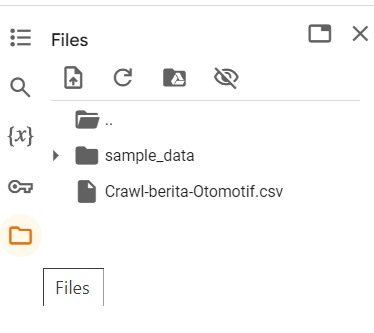

In [8]:
import pandas as pd

# Baca file CSV yang berada di direktori lokal
df = pd.read_csv('Crawl-berita-Otomotif.csv')

# Tampilkan DataFrame
print(df)


#Penjelasan:
#pd.read_csv('Crawl-berita-Otomotif.csv'): Ini akan membaca file CSV yang ada di direktori lokal tempat Anda bekerja (misalnya di Google Colab). Nama file harus sesuai dengan yang terlihat di panel Files.
#print(df): Akan menampilkan DataFrame yang dihasilkan dari file CSV tersebut.

                                               judul  \
0  Komunitas Moge HOG Indo Jakarta Chapter Tuntas...   
1  Hyundai Venue Siap Tantang Rocky-Raize, Segini...   
2  Ini Cara Komunitas Toyota Yaris Rayakan Ulang ...   
3  Perusahaan Induk KTM PHK Ratusan Karyawan Gara...   
4  Aktivitas Produksi Mobil di Pabrik GM Ekuador ...   
5  Penjualan Sepeda Motor Tetap 'Aman' Berkat Hal...   
6  Potret Mobil Baru Fajar Alfian, Hadiah untuk O...   
7  Pemerintah Diminta Tutup Gojek-Grab, Nasib Ojo...   
8  Sialnya Nasib Luca Marini: Balapan Sendirian d...   
9  Kesederhanaan Paus Fransiskus: Dulu Tolak Lamb...   

                         tanggal  \
0  Selasa, 03 Sep 2024 20:38 WIB   
1  Selasa, 03 Sep 2024 20:01 WIB   
2  Selasa, 03 Sep 2024 19:43 WIB   
3  Selasa, 03 Sep 2024 19:07 WIB   
4  Selasa, 03 Sep 2024 18:30 WIB   
5  Selasa, 03 Sep 2024 18:04 WIB   
6  Selasa, 03 Sep 2024 17:43 WIB   
7  Selasa, 03 Sep 2024 17:13 WIB   
8  Selasa, 03 Sep 2024 16:45 WIB   
9  Selasa, 03 Sep 2024 